# Housing Case Statement

## problem Statement

Consider a real estate company that has a dataset containing the prices pf sold properties in the Hyderabad region. The company wants to analyse the dataset according to the major factor such as area, bedroom,bathroom,parking etc

The company really wants
1. To identify the House prices according to area,bedroom,bathroom etc
2. The company wants to know on which category the houses is likly to be more sold 
3. To create a linear model quantitatively relates house prices with various number of bedroom,parking,bathroom..

# Step 1: Reading and understanding the data

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns
r=pd.read_csv("Housing.csv")

In [8]:
r.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Dictionary


price - House prices which depends on the given input dependent colunms
area - area of the house in squt which is independent column and numerical discrete
bedroom - How much bedroom are there in house which is categorical data


price - House prices which depends on the given input dependent colunms 
area - area of the house in squt which is independent column and numerical discrete 
bedroom - How much bedroom are there in house which is categorical data

In [10]:
r.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

### The above given is the columns of the datasaet

In [11]:
r.shape

(545, 13)

##### The number of rows and columns

In [14]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


##### This describe the info the dataset about data types such as object,int,float etc

In [16]:
r["guestroom"].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

##### The houses with the guestroom are 97   
###### The houses without the guestroom are 97

In [18]:
r["airconditioning"].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

##### The house with AC are 172   
##### The house without AC are 373


In [19]:
r["mainroad"].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

##### The houses connecting with the mainroad are 468  
##### The houses not connecting with the mainroad are 77


# Step 2 : Data Visualisation

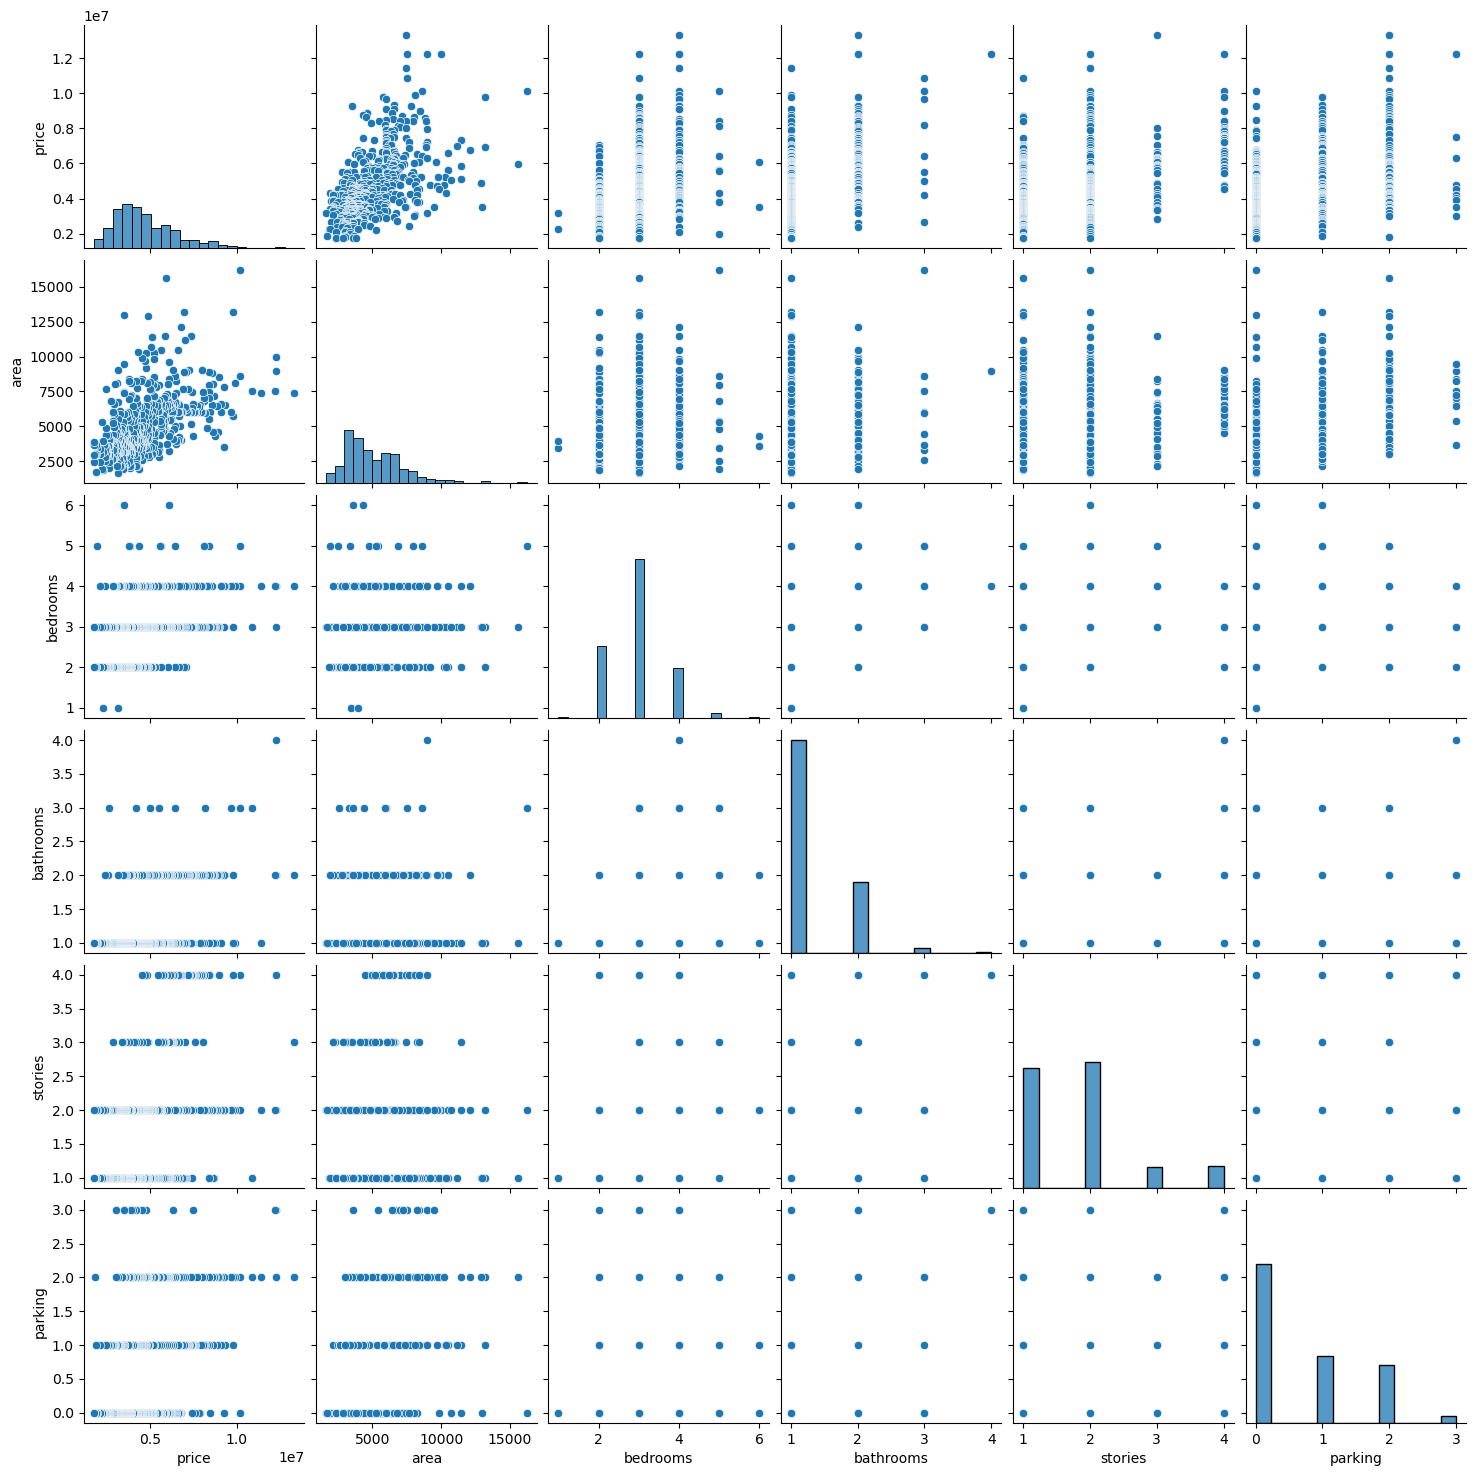

In [15]:
sns.pairplot(r)

<Axes: xlabel='area', ylabel='price'>

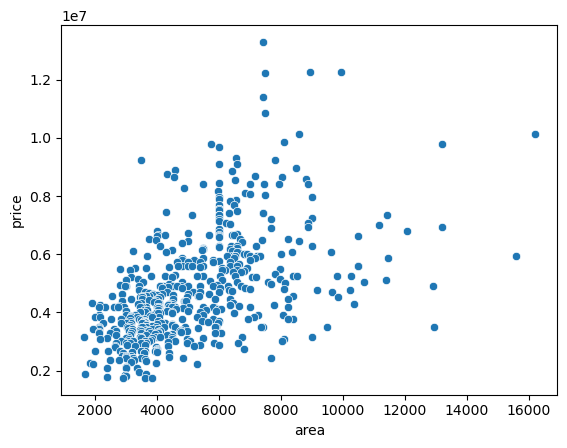

In [29]:
sns.scatterplot(data=r, x="area", y="price")

##### The plot show the linear relation between area and prices

<Axes: xlabel='bedrooms', ylabel='price'>

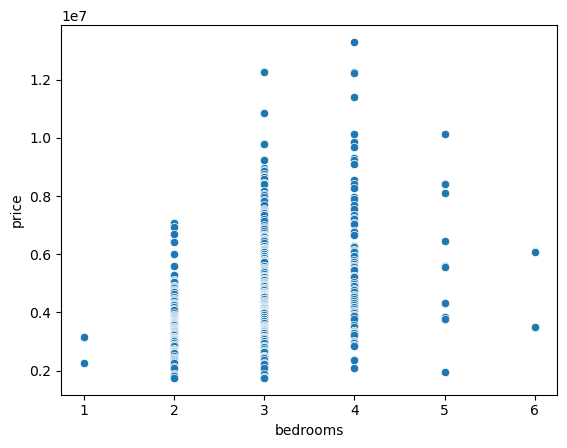

In [31]:
sns.scatterplot(data=r, x="bedrooms", y="price")

<Axes: xlabel='bedrooms', ylabel='price'>

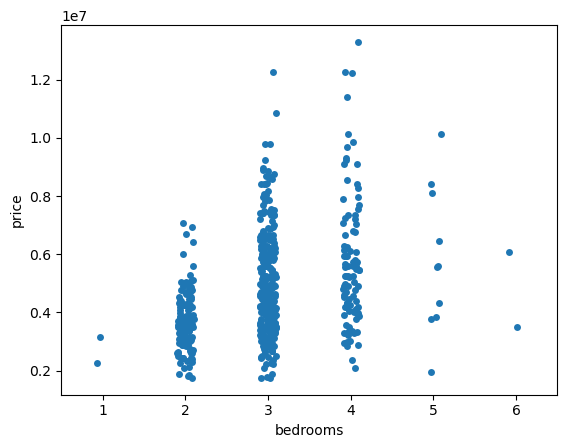

In [26]:
sns.stripplot(data=r, x="bedrooms", y="price")

##### The people are buying when the bedrooms are 3 and 4

<Axes: xlabel='guestroom', ylabel='price'>

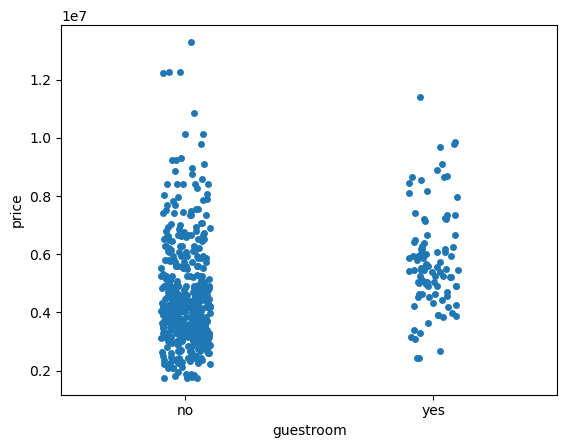

In [27]:
sns.stripplot(data=r, x="guestroom", y="price")

##### The more people are buying the houses without guestroom and prices are also high for no guestroom

<Axes: xlabel='airconditioning', ylabel='price'>

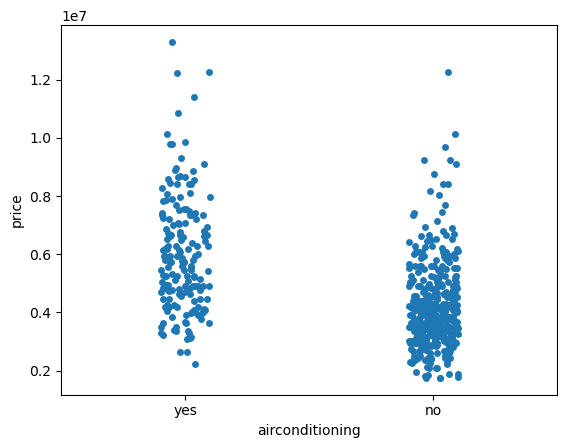

In [32]:
sns.stripplot(data=r, x="airconditioning", y="price")

##### The more people are buying when there is no AC in the house but the price is low   
##### The good amount of people are buying when there is AC in the house and the price is high

<Axes: xlabel='mainroad', ylabel='price'>

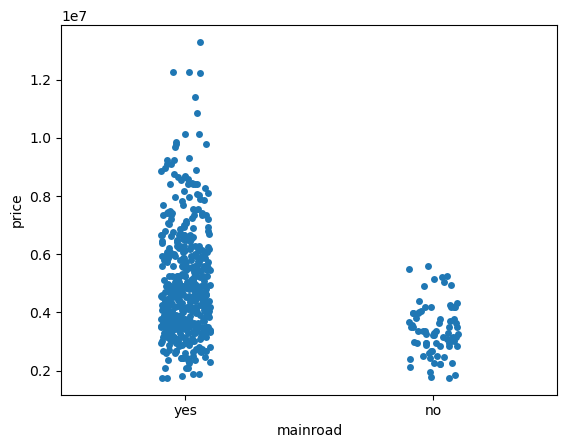

In [33]:
sns.stripplot(data=r, x="mainroad", y="price")

##### The majority people are buying when the road is connected

<Axes: xlabel='parking', ylabel='price'>

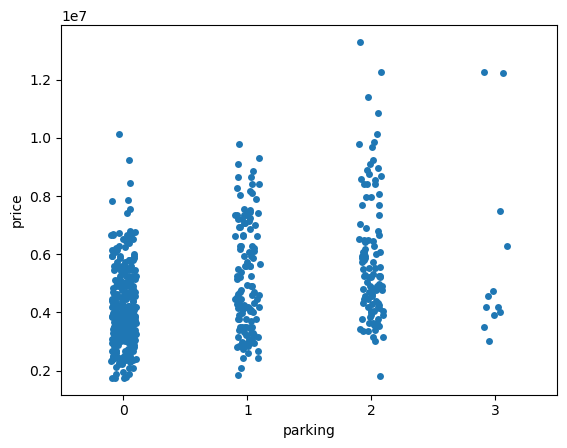

In [34]:
sns.stripplot(data=r, x="parking", y="price")

##### The more number of people are buying house when there is no parking but the price are lower    
##### The good number of people are buying house when there is 1 parking even the prices are good   
##### The good number of people are buying house when there is 2 parking even the prices are higher        

<Axes: xlabel='furnishingstatus', ylabel='price'>

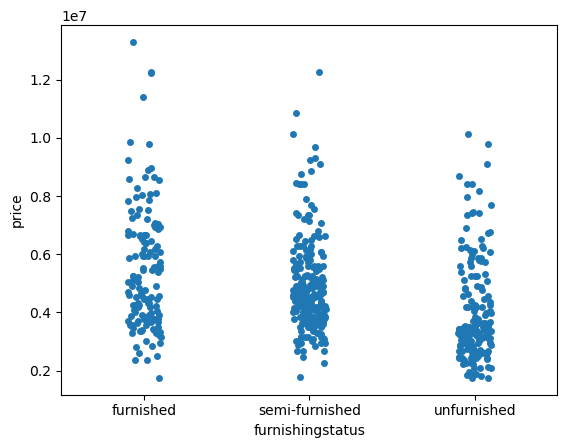

In [37]:
sns.stripplot(data=r, x="furnishingstatus", y="price")

##### If the house is semi-furnished the buyers are more

<Axes: xlabel='basement', ylabel='price'>

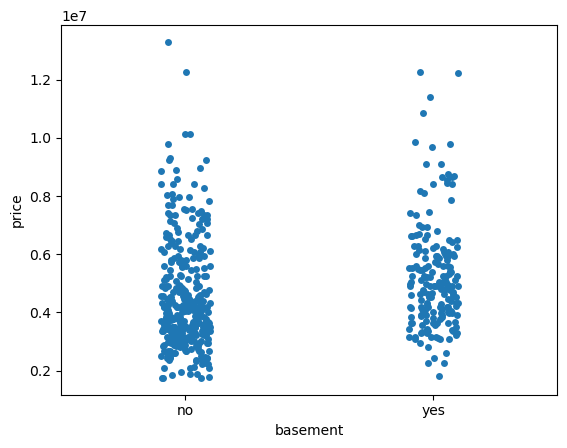

In [38]:
sns.stripplot(data=r, x="basement", y="price")

##### more number of people doesnot require the basement

In [39]:
r

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


<Axes: xlabel='furnishingstatus', ylabel='price'>

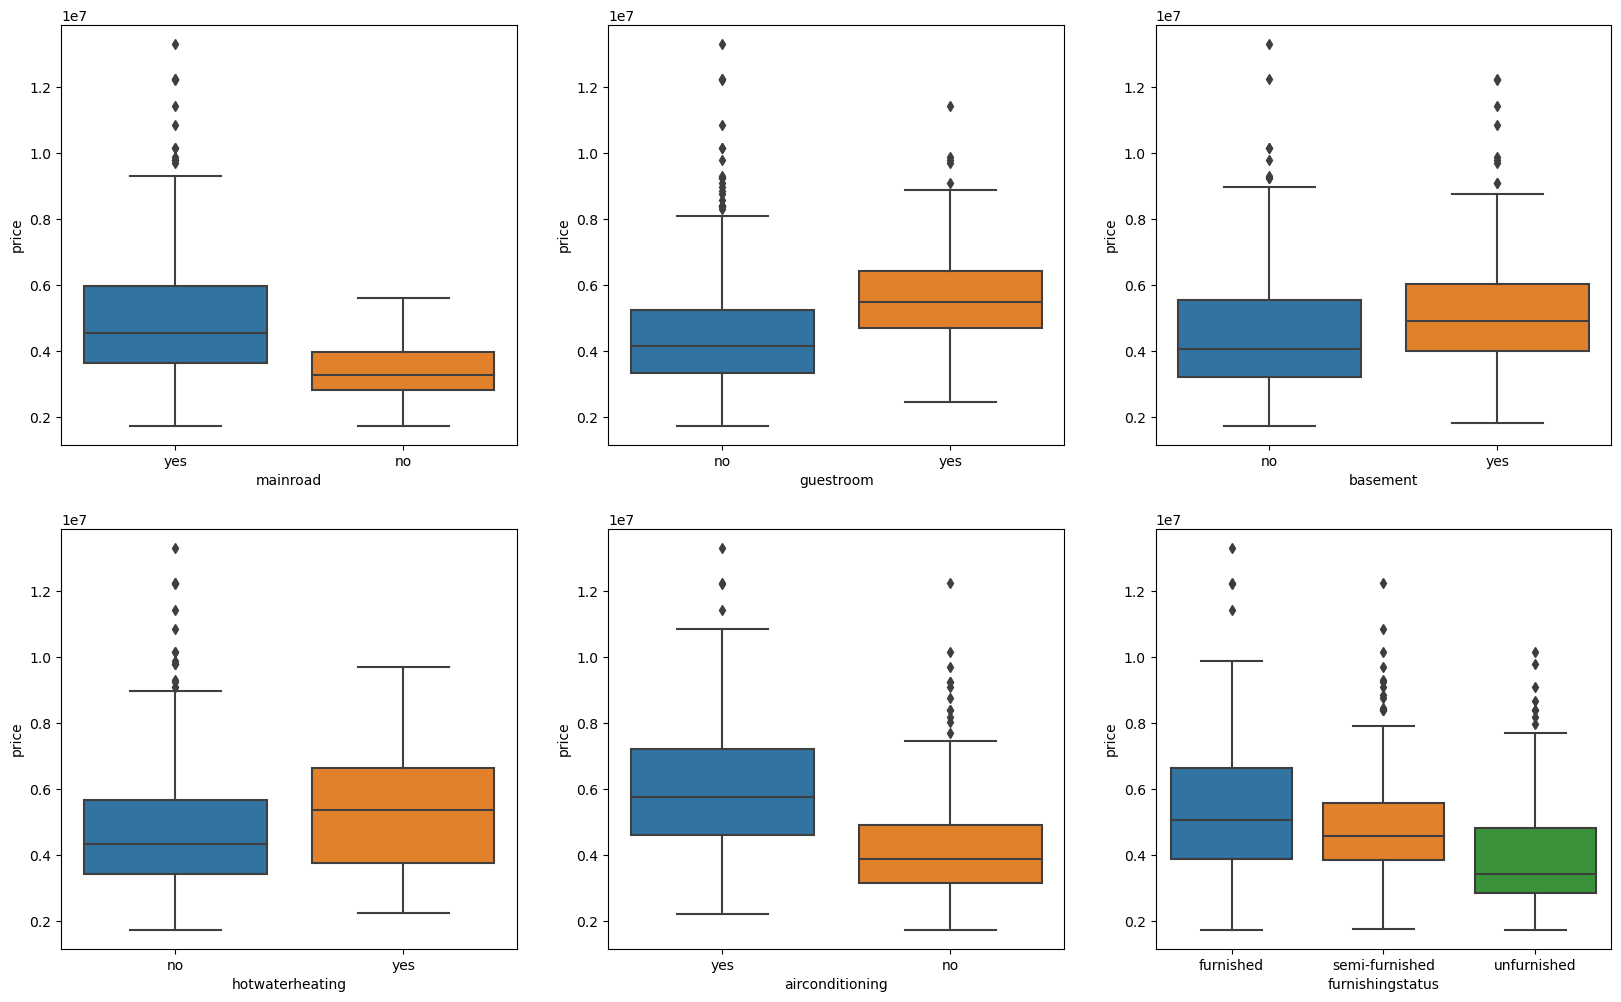

In [49]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x="mainroad",y="price",data=r)
plt.subplot(2,3,2)
sns.boxplot(x="guestroom",y="price",data=r)
plt.subplot(2,3,3)
sns.boxplot(x="basement",y="price",data=r)
plt.subplot(2,3,4)
sns.boxplot(x="hotwaterheating",y="price",data=r)
plt.subplot(2,3,5)
sns.boxplot(x="airconditioning",y="price",data=r)
plt.subplot(2,3,6)
sns.boxplot(x="furnishingstatus",y="price",data=r)

#### Mainroad vs Price
1. when the mainroad is connected with the house then buyers are more  
2. we can see that prices are also higher when mainroad is connected

#### Guestroom vs Price
1. If the Guestroom are there, then prices are higher     
2. The Average and Maximum price are more when there is guestroom is available

#### Basement vs Price 
1. If the houses with basement and without basement had very less differance in price
2. If basement is there then average prices are more 

#### HotwaterHeating vs Price
1. If the house had hotwaterheating then MAX and AVG prices are some more
2. If the house doesnot had hotwaterheating then prices are little bit less but are good in number

#### Aircondition vs Price
1. The huge number of buyers are falling for the AC houses
2. If the AC not available then price is very low and the buyers

#### Furnishingstatus vs Price
1. Having a Furnished house means the most people are likly to attract and paid amount is huge
2. Having the semi-furnished house, then people are buying but the price less
3. If the house is unfurnished then paid price are low

# Conclusion
    The project is all about the real estate business and the dataset which is provided is consists of rows for each house sold and the columns is for specifications for quality of the house such as area, bedroom, bathroom, AC, geustroom, AC and parking etc
    The given dataset having 546 rows and 13 columns on which we are working with pyhton language by using vast number of libraries such as pandas,seaborn and matplot etc which support the python language to read and understand the data and there such libraries which even help in data visualisation for creating the scatter plots, stripplots and boxplot etc
    The total story is this project gives the total understanding about the data of houses and gives the proper way to analyse the data and gives the answers in real time business